<a href="https://colab.research.google.com/github/payaswini126/gesture/blob/main/haand_gesture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training CNN Model...
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 228ms/step - accuracy: 0.4836 - loss: 0.9702 - val_accuracy: 0.3750 - val_loss: 0.8103
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - accuracy: 0.5473 - loss: 0.6937 - val_accuracy: 0.3750 - val_loss: 0.6992
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - accuracy: 0.5562 - loss: 0.6898 - val_accuracy: 0.6250 - val_loss: 0.6907
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step - accuracy: 0.4935 - loss: 0.6917 - val_accuracy: 0.3750 - val_loss: 0.6958
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - accuracy: 0.5477 - loss: 0.6903 - val_accuracy: 0.3750 - val_loss: 0.7188
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3750 - loss: 0.7188
Test Accuracy (CNN): 37.50%

Training SVM Model...
Test Accuracy (SVM): 57.50%

Testing on Random Image...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


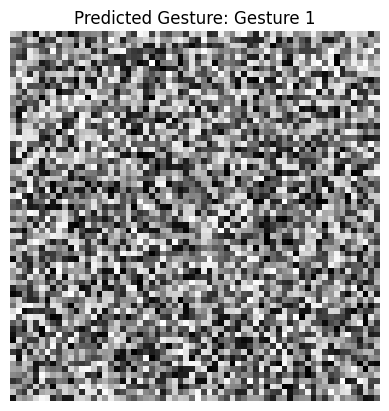

In [4]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# ----------- Simulated Dataset -----------
def generate_dummy_images(img_count=100, img_size=(64, 64)):
    """
    Generate dummy hand gesture images with random noise.
    """
    images = []
    labels = []
    for i in range(img_count):
        img = np.random.randint(0, 256, (img_size[0], img_size[1]), dtype=np.uint8)
        label = 0 if i < img_count // 2 else 1  # First half for Gesture 1, second half for Gesture 2
        images.append(img)
        labels.append(label)
    return images, labels

# Generate Dataset
gesture1_images, gesture1_labels = generate_dummy_images(img_count=100)
gesture2_images, gesture2_labels = generate_dummy_images(img_count=100)

# Combine Data
X = np.array(gesture1_images + gesture2_images).reshape(-1, 64, 64, 1) / 255.0  # Normalize
y = np.array(gesture1_labels + gesture2_labels)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------- CNN Model -----------
y_train_cnn = to_categorical(y_train, num_classes=2)
y_test_cnn = to_categorical(y_test, num_classes=2)

print("Training CNN Model...")
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_cnn, epochs=5, batch_size=32, validation_data=(X_test, y_test_cnn))

# Evaluate CNN
loss, acc = model.evaluate(X_test, y_test_cnn)
print(f"Test Accuracy (CNN): {acc * 100:.2f}%")

# ----------- SVM Model -----------
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

print("\nTraining SVM Model...")
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_flat, y_train)

# Predict and Evaluate
y_pred = svm_model.predict(X_test_flat)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy (SVM): {accuracy * 100:.2f}%")

# ----------- Visualize Predictions -----------
def visualize_prediction(img, label):
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"Predicted Gesture: {'Gesture 1' if label == 0 else 'Gesture 2'}")
    plt.axis('off')
    plt.show()

# Test on Random Test Images
print("\nTesting on Random Image...")
sample_index = np.random.randint(0, len(X_test))
sample_image = X_test[sample_index].reshape(1, 64, 64, 1)
cnn_prediction = np.argmax(model.predict(sample_image))

visualize_prediction(X_test[sample_index], cnn_prediction)

